# Introduction to Pandas

Pandas is a library providing high-performance, easy-to-use data structures and data analysis tools. The core of pandas is its *dataframe* which is essentially a table of data. Pandas provides easy and powerful ways to import data from a variety of sources and export it to just as many. It is also explicitly designed to handle *missing data* elegantly which is a very common problem in data from the real world.

The offical [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) is very comprehensive and you will be answer a lot of questions in there, however, it can sometimes be hard to find the right page. Don't be afraid to use Google to find help.

Pandas has a standard convention for importing it which you will see used in a lot of documentation so we will follow that in this course:

In [1]:
import pandas as pd
from pandas import Series, DataFrame

## Series

The simplest of pandas' data structures is the `Series`. It is a one-dimensional list-like structure.
Let's create one from a `list`:

In [2]:
Series([14, 7, 3, -7, 8])

0    14
1     7
2     3
3    -7
4     8
dtype: int64

There are three main components to this output.
The first column (`0`, `2`, etc.) is the index, by default this is numbers each row starting from zero.
The second column is our data, stored i the same order we entered it in our list.
Finally at the bottom there is the `dtype` which stands for 'data type' which is telling us that all our data is being stored as a 64-bit integer.
Usually you can ignore the `dtype` until you start doing more advanced things.

In the first example above we allowed pandas to automatically create an index for our `Series` (this is the `0`, `1`, `2`, etc. in the left column) but often you will want to specify one yourself

In [3]:
s = Series([14, 7, 3, -7, 8], index=['a', 'b', 'c', 'd', 'e'])
print(s)

a    14
b     7
c     3
d    -7
e     8
dtype: int64


We can use this index to retrieve individual rows

In [4]:
s['a']

14

to replace values in the series

In [5]:
s['c'] = -1

or to get a set of rows

In [6]:
s[['a', 'c', 'd']]

a    14
c    -1
d    -7
dtype: int64

### Exercise 1

- Create a Pandas `Series` with 10 or so elements where the indices are years and the values are numbers.
- Experiment with retrieving elements from the `Series`.
- Try making another `Series` with duplicate values in the index, what happens when you access those elements?
- How does a Pandas `Series` differ from a Python `list` or `dict`?

## Series operations

A `Series` is `list`-like in the sense that it is an ordered set of values. It is also `dict`-like since its entries can be accessed via key lookup. One very important way in which is differs is how it allows operations to be done over the whole `Series` in one go, a technique often referred to as 'broadcasting'.

A simple example is wanting to double the value of every entry in a set of data. In standard Python, you might have a list like

In [7]:
my_list = [3, 6, 8, 4, 10]

If you wanted to double every entry you might try simply multiplying the list by `2`:

In [8]:
my_list * 2

[3, 6, 8, 4, 10, 3, 6, 8, 4, 10]

but as you can see, that simply duplicated the elements. Instead you would have to use a `for` loop or a list comprehension:

In [9]:
[i * 2 for i in my_list]

[6, 12, 16, 8, 20]

With a pandas `Series`, however, you can perform bulk mathematical operations to the whole series in one go:

In [10]:
my_series = Series(my_list)
print(my_series)

0     3
1     6
2     8
3     4
4    10
dtype: int64


In [11]:
my_series * 2

0     6
1    12
2    16
3     8
4    20
dtype: int64

As well as bulk modifications, you can perform bulk selections by putting more complex statements in the square brackets:

In [12]:
s[s < 0]  # All negative entries

c   -1
d   -7
dtype: int64

In [13]:
s[(s * 2) > 4]  # All entries which, when doubled are greater than 4

a    14
b     7
e     8
dtype: int64

These operations work because the `Series` index selection can be passed a series of `True` and `False` values which it then uses to filter the result:

In [14]:
(s * 2) > 4

a     True
b     True
c    False
d    False
e     True
dtype: bool

Here you can see that the rows `a`, `b` and `e` are `True` while the others are `False`. Passing this to `s[...]` will only show rows that are `True`.

### Multi-Series operations

It is also possible to perform operations between two `Series` objects:

In [15]:
s2 = Series([23,5,34,7,5])
s3 = Series([7, 6, 5,4,3])
s2 - s3

0    16
1    -1
2    29
3     3
4     2
dtype: int64

### Exercise 2

- Create two `Series` objects of equal length with no specified index and containing any values you like. Perform some mathematical operations on them and experiment to make sure it works how you think.
- What happens then you perform an operation on two series which have different lengths? How does this change when you give the series some indices?
- Using the `Series` from the first exercise with the years for the index, Select all entries with even-numbered years. Also, select all those with odd-numbered years.

## DataFrame

While you can think of the `Series` as a one-dimensional list of data, pandas' `DataFrame` is a two (or possibly more) dimensional table of data. You can think of each column in the table as being a `Series`.

In [16]:
data = {'city': ['Paris', 'Paris', 'Paris', 'Paris',
                 'London', 'London', 'London', 'London',
                 'Rome', 'Rome', 'Rome', 'Rome'],
        'year': [2001, 2008, 2009, 2010,
                 2001, 2006, 2011, 2015,
                 2001, 2006, 2009, 2012],
        'pop': [2.148, 2.211, 2.234, 2.244,
                7.322, 7.657, 8.174, 8.615,
                2.547, 2.627, 2.734, 2.627]}
df = DataFrame(data)

This has created a `DataFrame` from the dictionary `data`. The keys will become the column headers and the values will be the values in each column. As with the `Series`, an index will be created automatically.

In [17]:
df

,city,year,pop
0,Paris,2001,2.148
1,Paris,2008,2.211
2,Paris,2009,2.234
3,Paris,2010,2.244
4,London,2001,7.322
5,London,2006,7.657
6,London,2011,8.174
7,London,2015,8.615
8,Rome,2001,2.547
9,Rome,2006,2.627


Or, if you just want a peek at the data, you can just grab the first few rows with:

In [18]:
df.head(3)

,city,year,pop
0,Paris,2001,2.148
1,Paris,2008,2.211
2,Paris,2009,2.234


Since we passed in a dictionary to the `DataFrame` constructor, the order of the columns will not necessarilly match the order in which you defined them. To enforce a certain order, you can pass a `columns` argument to the constructor giving a list of the columns in the order you want them:

In [19]:
DataFrame(data, columns=['year', 'city', 'pop'])


,year,city,pop
0,2001,Paris,2.148
1,2008,Paris,2.211
2,2009,Paris,2.234
3,2010,Paris,2.244
4,2001,London,7.322
5,2006,London,7.657
6,2011,London,8.174
7,2015,London,8.615
8,2001,Rome,2.547
9,2006,Rome,2.627


When we accessed elements from a `Series` object, it would select an element by row. However, by default `DataFrame`s index primarily by column. You can access any column directly by using square brackets or by named attributes:

In [20]:
df['year']

0     2001
1     2008
2     2009
3     2010
4     2001
5     2006
6     2011
7     2015
8     2001
9     2006
10    2009
11    2012
Name: year, dtype: int64

In [21]:
df.city

0      Paris
1      Paris
2      Paris
3      Paris
4     London
5     London
6     London
7     London
8       Rome
9       Rome
10      Rome
11      Rome
Name: city, dtype: object

Accessing a column like this returns a `Series` which will act in the same way as those we were using earlier.

Note that there is one additional part to this output, `Name: city`. Pandas has remembered that this `Series` was created from the `'city'` column in the `DataFrame`.

In [22]:
type(df.city)

pandas.core.series.Series

In [23]:
df.city == 'Paris'

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
Name: city, dtype: bool

This has created a new `Series` which has `True` set where the city is Paris and `False` elsewhere.

We can use filtered `Series` like this to filter the `DataFrame` as a whole. `df.city == 'Paris'` has returned a `Series` containing booleans. Passing it back into `df` as an indexing operation will use it to filter based on the `'city'` column.

In [24]:
df[df.city == 'Paris']

,city,year,pop
0,Paris,2001,2.148
1,Paris,2008,2.211
2,Paris,2009,2.234
3,Paris,2010,2.244


You can then carry on and grab another column after that filter:

In [25]:
df[df.city == 'Paris'].year

0    2001
1    2008
2    2009
3    2010
Name: year, dtype: int64

If you want to select a **row** from a `DataFrame` then you can use the `.loc` attribute which allows you to pass index values like:

In [26]:
df.loc[2]

city    Paris
year     2009
pop     2.234
Name: 2, dtype: object

In [27]:
df.loc[2]['city']

'Paris'

## Adding new columns

New columns can be added to a `DataFrame` simply by assigning them by index (as you would for a Python `dict`) and can be deleted with the `del` keyword in the same way:

In [28]:
df['continental'] = df.city != 'London'
df

,city,year,pop,continental
0,Paris,2001,2.148,True
1,Paris,2008,2.211,True
2,Paris,2009,2.234,True
3,Paris,2010,2.244,True
4,London,2001,7.322,False
5,London,2006,7.657,False
6,London,2011,8.174,False
7,London,2015,8.615,False
8,Rome,2001,2.547,True
9,Rome,2006,2.627,True


In [29]:
del df['continental']

### Exercise 3

- Create the `DataFrame` containing the census data for the three cities.
- Select the data for the year 2001. Which city had the smallest population that year?
- Find all the cities which had a population smaller than 2.6 million.

## Reading from file

One of the msot common situations is that you have some data file containing the data you want to read. Perhaps this is data you've produced yourself or maybe it's from a collegue. In an ideal world the file will be perfectly formatted and will be trivial to import into pandas but since this is so often not the case, it provides a number of features to make your ife easier.

Full information on reading and writing is available in the pandas manual on [IO tools](http://pandas.pydata.org/pandas-docs/stable/io.html) but first it's worth noting the common formats that pandas can work with:
- Comma separated tables (or tab-separated or space-separated etc.)
- Excel spreadsheets
- HDF5 files
- SQL databases

For this course we will focus on plain-text CSV files as they are perhaps the most common format. Imagine we have a CSV file like (you can download this file from [city_pop.csv](https://raw.githubusercontent.com/milliams/data_analysis_python/master/city_pop.csv)):

In [30]:
!cat city_pop.csv  # Uses the IPython 'magic' !cat to print the file

This is an example CSV file
The text at the top here is not part of the data but instead is here
to describe the file. You'll see this quite often in real-world data.
A -1 signifies a missing value.

year;London;Paris;Rome
2001;7.322;2.148;2.547
2006;7.652;;2.627
2008;-1;2.211;
2009;-1;2.234;2.734
2011;8.174;;
2012;-1;2.244;2.627
2015;8.615;;


We can use the pandas function `read_csv()` to read the file and convert it to a `DataFrame`. Full documentation for this function can be found in [the manual](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) or, as with any Python object, directly in the notebook by putting a `?` after the name:

In [31]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [32]:
pd.read_csv('city_pop.csv')

,This is an example CSV file
0,The text at the top here is not part of the da...
1,to describe the file. You'll see this quite of...
2,A -1 signifies a missing value.
3,year;London;Paris;Rome
4,2001;7.322;2.148;2.547
5,2006;7.652;;2.627
6,2008;-1;2.211;
7,2009;-1;2.234;2.734
8,2011;8.174;;
9,2012;-1;2.244;2.627


We can see that by default it's done a fairly bad job of parsing the file (this is mostly because I;ve construsted the `city_pop.csv` file to be as obtuse as possible). It's making a lot of assumptions about the structure of the file but in general it's taking quite a naïve approach.

The first this we notice is that it's treating the text at the top of the file as though it's data. Checking [the documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) we see that the simplest way to solve this is to use the `skiprows` argument to the function to which we give an integer giving the number of rows to skip:

In [33]:
pd.read_csv(
    'city_pop.csv',
    skiprows=5,
)

,year;London;Paris;Rome
0,2001;7.322;2.148;2.547
1,2006;7.652;;2.627
2,2008;-1;2.211;
3,2009;-1;2.234;2.734
4,2011;8.174;;
5,2012;-1;2.244;2.627
6,2015;8.615;;


The next most obvious problem is that it is not separating the columns at all. This is controlled by the `sep` argument which is set to `','` by default (hence *comma* separated values). We can simply set it to the appropriate semi-colon:

In [34]:
pd.read_csv(
    'city_pop.csv',
    skiprows=5,
    sep=';'
)

,year,London,Paris,Rome
0,2001,7.322,2.148,2.547
1,2006,7.652,NaN,2.627
2,2008,-1.000,2.211,NaN
3,2009,-1.000,2.234,2.734
4,2011,8.174,NaN,NaN
5,2012,-1.000,2.244,2.627
6,2015,8.615,NaN,NaN


Reading the descriptive header of our data file we see that a value of `-1` signifies a missing reading so we should mark those too. This can be done after the fact but it is simplest to do it at import-time using the `na_values` argument:

In [35]:
pd.read_csv(
    'city_pop.csv',
    skiprows=5,
    sep=';',
    na_values='-1'
)

,year,London,Paris,Rome
0,2001,7.322,2.148,2.547
1,2006,7.652,NaN,2.627
2,2008,NaN,2.211,NaN
3,2009,NaN,2.234,2.734
4,2011,8.174,NaN,NaN
5,2012,NaN,2.244,2.627
6,2015,8.615,NaN,NaN


The last this we want to do is use the `year` column as the index for the `DataFrame`. This can be done by passing the name of the column to the `index_col` argument:

In [36]:
df3 = pd.read_csv(
    'city_pop.csv',
    skiprows=5,
    sep=';',
    na_values='-1',
    index_col='year'
)
df3

,London,Paris,Rome
year,,,
2001,7.322,2.148,2.547
2006,7.652,NaN,2.627
2008,NaN,2.211,NaN
2009,NaN,2.234,2.734
2011,8.174,NaN,NaN
2012,NaN,2.244,2.627
2015,8.615,NaN,NaN


### Exercise 4

- Alongside `city_pop.csv` there is another file called `cetml1659on.dat` (also available from [here](https://raw.githubusercontent.com/milliams/data_analysis_python/master/cetml1659on.dat)). This contains some historical weather data for a location in the UK. Import that file as a Pandas `DataFrame` using `read_csv()`, making sure that you cover all the NaN values.
- How many years had a negative average temperature in January?
- What was the average temperature in June over the years in the data set? Tip: look in the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) for which method to call.

We will come back to this data set in a later stage.

# Plotting data with matplotlib

Plotting of data is pandas is handled by an external Python module called *matplotlib*. Like pandas it is a large library and has a venerable history (first released in 2003) and so we couldn't hope to cover all its functionality in this course. To see the wide range of possibilities you have with matplotlib see its [example gallery](http://matplotlib.org/gallery.html).

Here we will cover the basic uses of it and how it integrates with pandas. While working through these examples you will likely find it very useful to refer to the [matplotlib documentation](http://matplotlib.org/api/pyplot_api.html).

First we import pandas and numpy in the same way as we did previously.

In [37]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

Some matplotlib functionality is provided directly through pandas (such as the `plot()` method as we will see) but for much of it you need to import the matplotlib interface itself.

The most common interface to matplotlib is its `pyplot` module which provides a way to affect the current state of matplotlib directly. [By convention](http://matplotlib.org/faq/usage_faq.html#coding-styles) this is imported as `plt`.

We also set the figure format to be SVG so that the plots look a little nicer in our Jupyter notebook.

In [38]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

Once we have imported matplotlib we can start calling its functions. Any functions called on the `plt` object will affect all of matplotlib from that point on in the script.

We first need to import some data to plot. Let's start with the data from the pandas section (available from [cetml1659on.dat](https://raw.githubusercontent.com/milliams/data_analysis_python/master/cetml1659on.dat)) and import it into a `DataFrame`:

In [39]:
df = pd.read_csv(
    'cetml1659on.dat',  # file name
    skiprows=6,  # skip header
    sep='\s+',  # whitespace separated
    na_values=['-99.9', '-99.99'],  # NaNs
)
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63


Pandas integrates matplotlib directly into itself so any dataframe can be plotted easily simply by calling the `plot()` method on one of the columns. This creates a plot object which you can then edit and alter, for example by setting the axis labels using the `plt.ylabel()` function before displaying it with `plt.show()`.

Matplotlib operates on a single global state and calling any function on `plt` will alter that state. Calling `df.plot()` sets the *currently operating* plot. `plt.ylabel()` then alters that state and `plt.show()` displays it.

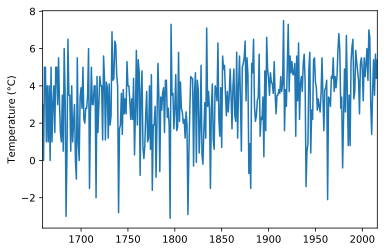

In [40]:
df['JAN'].plot()

plt.ylabel(r'Temperature ($\degree$C)')

plt.show()

### Exercise 3

- Make sure you can reproduce the plot above. Try tweaking the labels or which column is plotted.
- Try putting in two `plot()` calls with different months (January and July for example) before calling `show()`.

## Making it prettier

While it's useful to be able to quickly plot any data we have in front of us, matplotlib's power comes from its configurability. Let's experiment with a dataset and see how much we can change the plot.

We'll start with a simple `DataFrame` contianing two columns, one with the values of a cosine, the other with the values of a sine.

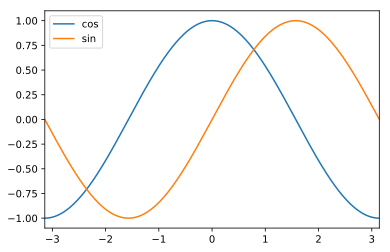

In [41]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
data = {'cos': np.cos(X), 'sin': np.sin(X)}
trig = DataFrame(index=X, data=data)

trig.plot()
plt.show()

You can see that it has plotted the sine and cosine curves between $\pi$ and $-\pi$. Now, let's go through and see how we can affect the display of this plot.

### Changing colours and line widths

First step, we want to have the cosine in blue and the sine in red and a slighty thicker line for both of them.

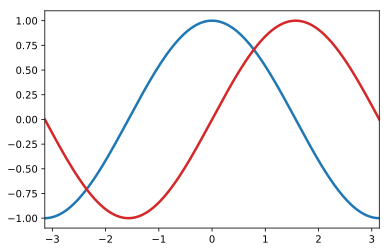

In [42]:
trig.cos.plot(color="tab:blue", linewidth=2.5, linestyle="-")
trig.sin.plot(color="tab:red", linewidth=2.5, linestyle="-")

plt.show()

### Exercise 4

- Using the temperature dataset, set the colours of the July and January lines to a warm colour and a cool colour.
- Add in the yearly average column to the plot with a dashed line style.

### Setting limits

Current limits of the figure are a bit too tight and we want to make some space in order to clearly see all data points.

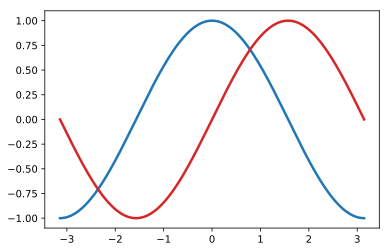

In [43]:
trig.cos.plot(color="tab:blue", linewidth=2.5, linestyle="-")
trig.sin.plot(color="tab:red", linewidth=2.5, linestyle="-")

### New code
plt.xlim(trig.index.min() * 1.1, trig.index.max() * 1.1)
plt.ylim(trig.cos.min() * 1.1, trig.cos.max() * 1.1)
### End of new code

plt.show()

### Setting ticks

Current ticks are not ideal because they do not show the interesting values ($\pm\pi$,$\pm\frac{\pi}{2}$) for sine and cosine. We’ll change them such that they show only these values.

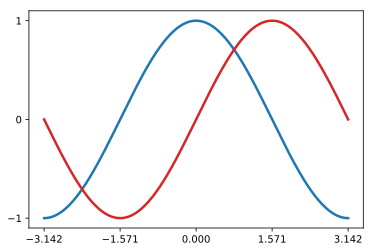

In [44]:
trig.cos.plot(color="tab:blue", linewidth=2.5, linestyle="-")
trig.sin.plot(color="tab:red", linewidth=2.5, linestyle="-")

plt.xlim(trig.index.min() * 1.1, trig.index.max() * 1.1)
plt.ylim(trig.cos.min() * 1.1, trig.cos.max() * 1.1)

### New code
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
### End of new code

plt.show()

### Setting tick labels

Ticks are now properly placed but their label is not very explicit. We could guess that 3.142 is $\pi$ but it would be better to make it explicit. When we set tick values, we can also provide a corresponding label in the second argument list. Note that we’ll use LaTeX to allow for nice rendering of the label.

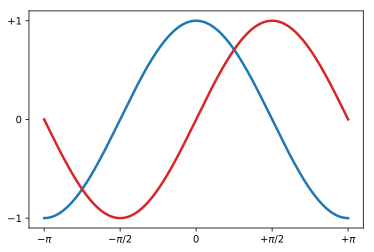

In [45]:
trig.cos.plot(color="tab:blue", linewidth=2.5, linestyle="-")
trig.sin.plot(color="tab:red", linewidth=2.5, linestyle="-")

plt.xlim(trig.index.min() * 1.1, trig.index.max() * 1.1)
plt.ylim(trig.cos.min() * 1.1, trig.cos.max() * 1.1)

### New code
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])
### End of new code

plt.show()

### Moving spines

Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, they were on the border of the axis. We’ll change that since we want to have them in the middle. Since there are four of them (top/bottom/left/right), we’ll discard the top and right by setting their color to none and we’ll move the bottom and left ones to coordinate 0 in data space coordinates.

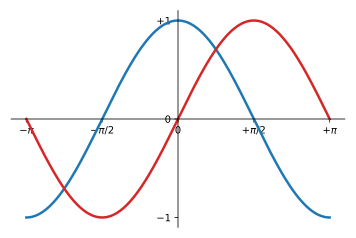

In [46]:
trig.cos.plot(color="tab:blue", linewidth=2.5, linestyle="-")
trig.sin.plot(color="tab:red", linewidth=2.5, linestyle="-")

plt.xlim(trig.index.min() * 1.1, trig.index.max() * 1.1)
plt.ylim(trig.cos.min() * 1.1, trig.cos.max() * 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

### New code
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
### End of new code

plt.show()

### Adding a legend

Let’s add a legend in the upper left corner. This only requires adding the keyword argument label (that will be used in the legend box) to the plot commands.

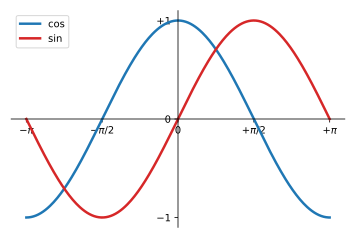

In [47]:
trig.cos.plot(color="tab:blue", linewidth=2.5, linestyle="-")
trig.sin.plot(color="tab:red", linewidth=2.5, linestyle="-")

plt.xlim(trig.index.min() * 1.1, trig.index.max() * 1.1)
plt.ylim(trig.cos.min() * 1.1, trig.cos.max() * 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

### New code
plt.legend(loc='upper left')
### End of new code

plt.show()

### Annotate some points

Let’s annotate some interesting points using the annotate command. We chose the $\frac{2}{3}\pi$ value and we want to annotate both the sine and the cosine. We’ll first draw a marker on the curve as well as a straight dotted line. Then, we’ll use the annotate command to display some text with an arrow.

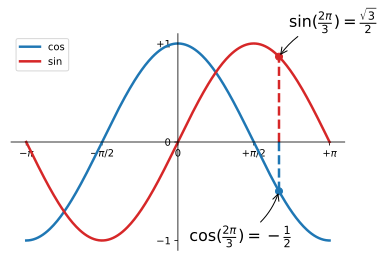

In [48]:
trig.cos.plot(color="tab:blue", linewidth=2.5, linestyle="-")
trig.sin.plot(color="tab:red", linewidth=2.5, linestyle="-")

plt.xlim(trig.index.min() * 1.1, trig.index.max() * 1.1)
plt.ylim(trig.cos.min() * 1.1, trig.cos.max() * 1.1)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.legend(loc='upper left')

### New code
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='tab:blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='tab:blue')

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='tab:red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='tab:red')

plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
### End of new code

plt.show()

Now you know how to make different modifications to your plots we can make some of these changes to our temperature data.

## Saving plot to a file

You can take any plot you've created within Jupyter and save it to a file on disk using the `plt.savefig()` function. You give the function the name of the file to create and it will use whatever format is specified by the name.

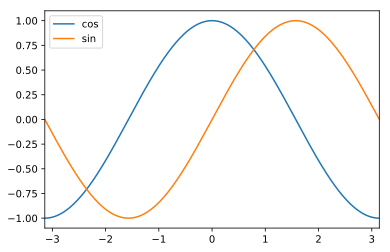

<Figure size 432x288 with 0 Axes>

In [49]:
trig.plot()

plt.show()

plt.savefig('my_fig.svg')

You can then display the figure in Jupyter with `![](my_fig.svg)`

![](my_fig.svg)

### Exercise 5

- Add in a legend for the data.
- Add an annotation to one of the spikes in the data. Make sure the label is placed nicely.
 - Tip: you can get the year and temperature for a spike using:
 ```python
  warm_winter_year = df['JAN'].idxmax()
  warm_winter_temp = df['JAN'].max()
 ```
- Save the figure to a file and display it in your Jupyter notebook.

## Bar charts

Of course, Matplotlib can plot more than just line graphs. One of the other most common plot types is a bar chart. Let's work towards plotting a bar chart of the average temperature per decade.

Let's start by adding a new column to the data frame which represents the decade. We create it by taking the index (which is a list of years), converting each element to a string and then replacing the fourth character with a `'0'`.

In [50]:
years = Series(df.index, index=df.index).apply(str)
decade = years.apply(lambda x: x[:3]+'0')

df['decade'] = decade
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR,decade
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87,1650
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10,1660
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78,1660
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52,1660
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63,1660


Once we have our decade column, we can use Pandas `groupby()` function to gather our data by decade and then aggregate it by taking the mean of each decade.

In [51]:
by_decade = df.groupby('decade')
agg = by_decade.aggregate(np.mean)

agg.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
decade,,,,,,,,,,,,,
1650,3.00,4.00,6.00,7.00,11.00,13.00,16.00,16.00,13.00,10.00,5.00,2.00,8.870
1660,2.60,4.00,5.10,7.70,10.60,14.50,16.00,15.70,13.30,10.00,6.30,3.80,9.157
1670,3.25,2.35,4.50,7.25,11.05,14.40,15.80,15.25,12.40,8.95,5.20,2.45,8.607
1680,2.50,2.80,4.80,7.40,11.45,14.00,15.45,14.90,12.70,9.55,5.45,4.05,8.785
1690,1.89,2.49,3.99,6.79,9.60,13.44,15.27,14.65,11.93,8.64,5.26,3.31,8.134


At this point, `agg` is a standard Pandas `DataFrame` so we can plot it like any other, by putting `.bar` after the `plot` call:

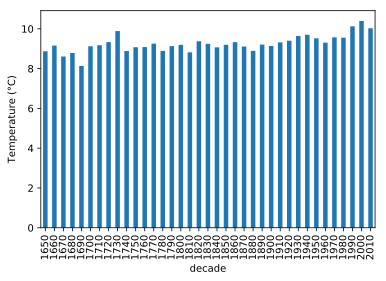

In [52]:
agg.YEAR.plot.bar()

plt.ylabel(r'Temperature ($\degree$C)')

plt.show()

### Exercise 6

1. Plot a bar chart of the average temperature per *century*.
 - Set the limits of the y-axis to zoom in on the data.

2. Plot a *histogram* of the average annual temperature
 - Make sure that the x-axis is labelled correctly.
 - Tip: Look in the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for the right command to run
 
3. Plot a scatter plot of each year's February temperature plotted against that year's January temperature. Is there an obvious correlation?